In [90]:
import pandas as pd
combined_data = pd.read_csv('datasets/pre_processed_data.csv')

In [91]:
combined_data.shape

(48830, 13)

In [92]:
x = combined_data.drop(columns=['income'], axis=1)
y = combined_data['income']

**<big>Naïve Bayes</big>**

In [93]:
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
# gb = GaussianNB()
# best_ac =0
# best_rs = 0
# for i in range(0,10000):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
#     gb.fit(x_train,y_train)
#     y_pred = gb.predict(x_test)
#     ac = accuracy_score(y_test,y_pred)
#     if ac > best_ac :
#         best_ac = ac
#         best_rs = i
# 
# print(best_ac,best_rs)        

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=14915)  #Splitting the dataset into training and testing set 14915 8262 2778

In [95]:
#implementing Naïve Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [96]:
#Making predictions
y_nb_pred = gb.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_nb_pred)

0.820499692811796

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_nb_pred)

array([[7121,  363],
       [1390,  892]], dtype=int64)

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_nb_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7484
           1       0.71      0.39      0.50      2282

    accuracy                           0.82      9766
   macro avg       0.77      0.67      0.70      9766
weighted avg       0.81      0.82      0.80      9766


In [100]:
print(f'Train Accuracy : {gb.score(x_train,y_train)}')
print(f'Test Accuracy : {gb.score(x_test,y_test)}')          #As the accuracies are close , the model has no over fitting issues

Train Accuracy : 0.8028875691173459
Test Accuracy : 0.820499692811796


In [101]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_nb_pred)
roc_auc

0.6711908571765838

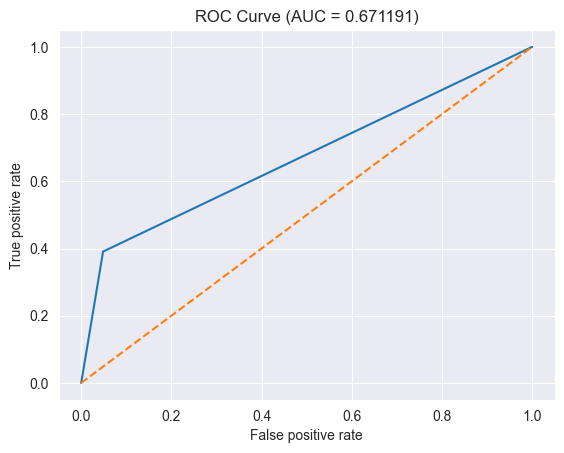

In [ ]:
#ROC curve for naive bayes
import matplotlib.pyplot as plt
fpr,tpr,thresholds = roc_curve(y_test,y_nb_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve (AUC = {:2f})'.format(roc_auc))
plt.show()

**<big>Random Forest</big>**

In [103]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [104]:
y_rf_pred = rf.predict(x_test)
accuracy_score(y_test,y_rf_pred)

0.8609461396682367

In [105]:
print(f'Train Accuracy : {rf.score(x_train,y_train)}')
print(f'Test Accuracy : {rf.score(x_test,y_test)}')     #As the test accuracy is less than train accuracy,the model has overfitting issues 

Train Accuracy : 0.9725578537784149
Test Accuracy : 0.8609461396682367


**<big>-Random Forest HyperParameter Tuning</big>**

In [106]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
max_features = ['auto','sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

In [107]:
param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap
}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [108]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator=rf, param_grid = param_grid, cv=3, verbose=2, n_jobs=4)

In [109]:
rf_Grid.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


C:\Users\TUF\Machine_Learning\venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\TUF\Machine_Learning\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TUF\Machine_Learning\venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\TUF\Machine_Learning\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=50, random_state=42),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [110]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 17}

**<big>-Building a Random Forest Model with the best parameters</big>**

In [111]:
rf_best = RandomForestClassifier(n_estimators=17, max_depth=4, max_features='sqrt', min_samples_leaf=1,min_samples_split=2, bootstrap=True)

In [112]:
rf_best.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=17)

In [113]:
y_rf_best_pred = rf_best.predict(x_test)
accuracy_score(y_test,y_rf_best_pred)

0.858898218308417

In [114]:
confusion_matrix(y_test,y_rf_best_pred)

array([[7214,  270],
       [1108, 1174]], dtype=int64)

In [115]:
print(classification_report(y_test,y_rf_best_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7484
           1       0.81      0.51      0.63      2282

    accuracy                           0.86      9766
   macro avg       0.84      0.74      0.77      9766
weighted avg       0.85      0.86      0.85      9766


In [116]:
print(f'Train Accuracy : {rf_best.score(x_train,y_train)}')
print(f'Test Accuracy : {rf_best.score(x_test,y_test)}')       #As the accuracies are close , the model has no over fitting issues

Train Accuracy : 0.8470714724554577
Test Accuracy : 0.858898218308417


In [117]:
roc_auc = roc_auc_score(y_test,y_rf_best_pred)
roc_auc

0.7391920174666516

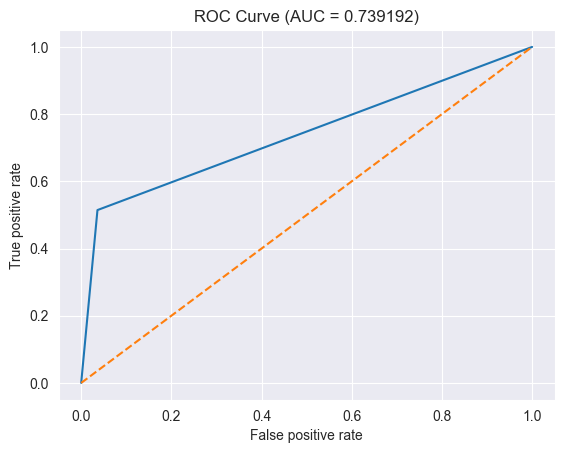

In [ ]:
#ROC curve for random forest
fpr,tpr,thresholds = roc_curve(y_test,y_rf_best_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve (AUC = {:2f})'.format(roc_auc))
plt.show()